In [7]:
%matplotlib inline

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

In [53]:
train = pd.read_csv('../input/train.csv')

In [20]:
def load_data():
    """
    process train and test data
    :return:
    (y, X, X_submission, ids_submission)
    """
    # read in data
    train = pd.read_csv('../input/train.csv')
    test = pd.read_csv('../input/test.csv')

    # combine train and test to ease transformations
    combined = train.append(test, ignore_index=True)
    combined.drop(['Id', 'SalePrice'], axis=1, inplace=True)

    X = combined.iloc[:train.shape[0], :]
    X_submission = combined.iloc[train.shape[0]:, :]

    ids_submission = test['Id'].values
    y = np.log(train['SalePrice'].values)

    return y, X, X_submission, ids_submission



In [21]:
y, X, X_submission, ids_submission = load_data()

(array([   5.,   12.,   54.,  184.,  470.,  400.,  220.,   90.,   19.,    6.]),
 array([ 10.46024211,  10.7676652 ,  11.07508829,  11.38251138,
         11.68993448,  11.99735757,  12.30478066,  12.61220375,
         12.91962684,  13.22704994,  13.53447303]),
 <a list of 10 Patch objects>)

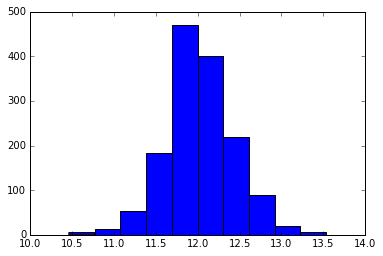

In [22]:
plt.hist(y)

In [23]:
pd.DataFrame.plot.hist(X)

TypeError: unbound method hist() must be called with FramePlotMethods instance as first argument (got DataFrame instance instead)

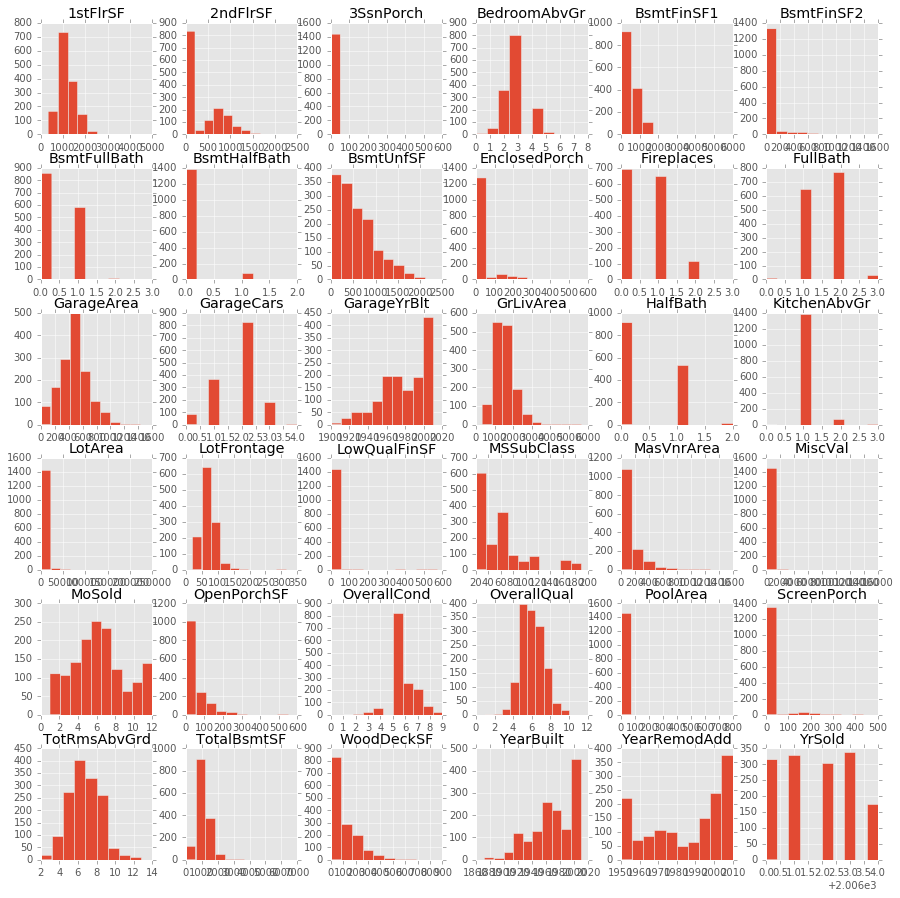

In [27]:
plt.style.use('ggplot')
X.hist(figsize=[15,15]);

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
3SsnPorch        1460 non-null int64
Alley            91 non-null object
BedroomAbvGr     1460 non-null int64
BldgType         1460 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422 non-null object
BsmtFinSF1       1460 non-null float64
BsmtFinSF2       1460 non-null float64
BsmtFinType1     1423 non-null object
BsmtFinType2     1422 non-null object
BsmtFullBath     1460 non-null float64
BsmtHalfBath     1460 non-null float64
BsmtQual         1423 non-null object
BsmtUnfSF        1460 non-null float64
CentralAir       1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
Electrical       1459 non-null object
EnclosedPorch    1460 non-null int64
ExterCond        1460 non-null object
ExterQual        1460 non-null object
Exterior1st      1460

In [55]:
train['target'] = np.log(train['SalePrice'])

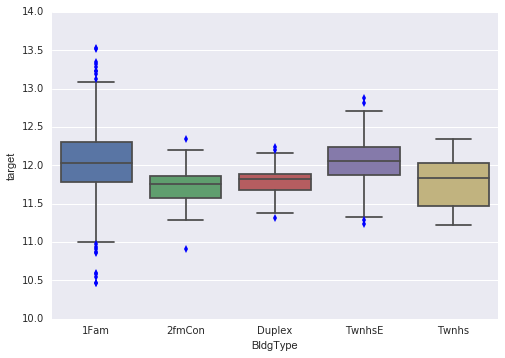

In [57]:
sns.boxplot(x="BldgType", y="target", data=train);

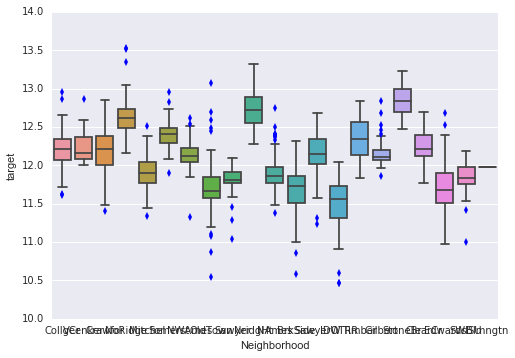

In [61]:
sns.boxplot(x="Neighborhood", y="target", data=train[train.BldgType == '1Fam']);

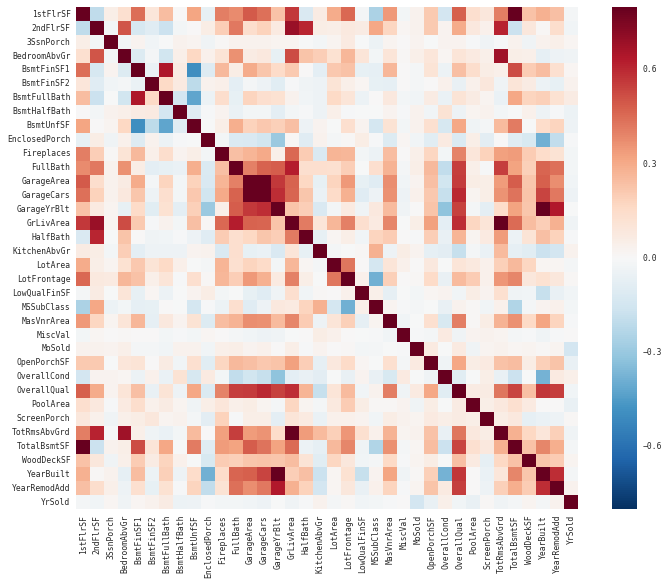

In [65]:
sns.set(context="paper", font="monospace")
corrmat = X.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

## Use matplotlib directly to emphasize known networks
#networks = corrmat.columns.get_level_values("network")
#for i, network in enumerate(networks):
#    if i and network != networks[i - 1]:
#        ax.axhline(len(networks) - i, c="w")
#        ax.axvline(i, c="w")
#f.tight_layout()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns.get_level_values("network")
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()
